gelen veri kümesinin ilk beş satırı:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,berkan
0,0,3,male,22.0,1,0.0,7.2500,S,BY
1,1,1,male,38.0,1,0.0,71.2833,C,NaN
2,1,3,female,26.0,0,0.0,7.9250,D,NaN
3,1,1,female,35.0,1,0.0,53.1000,A,NaN
4,0,3,male,35.0,0,0.0,8.0500,D,NaN



veri kümesinin özeti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  100 non-null    int64  
 1   pclass    100 non-null    int64  
 2   sex       100 non-null    object 
 3   age       100 non-null    float64
 4   sibsp     100 non-null    int64  
 5   parch     100 non-null    float64
 6   fare      100 non-null    float64
 7   embarked  100 non-null    object 
 8   berkan    1 non-null      object 
dtypes: float64(3), int64(3), object(3)
memory usage: 7.2+ KB


None


 veri kümesinin temel istatistileri:


,survived,pclass,age,sibsp,parch,fare
count,100.00,100.00000,100.000000,100.00000,100.000000,100.000000
mean,0.45,1.90000,38.380000,2.60000,2.360000,244.410783
std,0.50,0.78496,22.625596,1.74657,1.678864,145.458050
min,0.00,1.00000,1.500000,0.00000,0.000000,7.250000
25%,0.00,1.00000,19.500000,1.00000,1.000000,113.325000
50%,0.00,2.00000,34.400000,3.00000,2.000000,265.630000
75%,1.00,3.00000,57.350000,4.00000,4.000000,367.900000
max,1.00,3.00000,79.800000,5.00000,5.000000,499.960000



Eksik değer analizi:
survived     0
pclass       0
sex          0
age          0
sibsp        0
parch        0
fare         0
embarked     0
berkan      99
dtype: int64


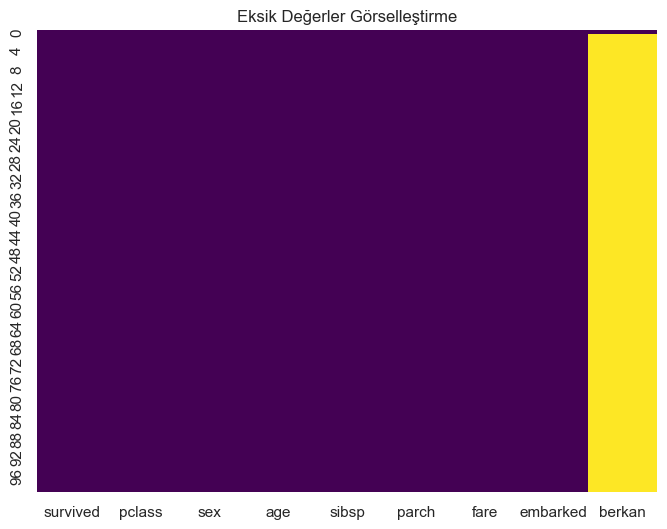

/var/folders/qg/23392h_n7lx_zx6pzx2jrxlc0000gn/T/ipykernel_22465/3218000643.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='Set2')


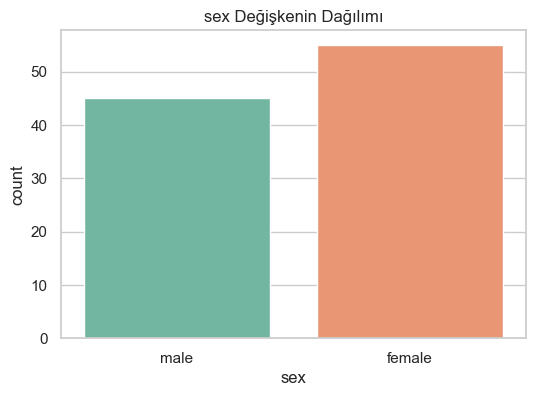

/var/folders/qg/23392h_n7lx_zx6pzx2jrxlc0000gn/T/ipykernel_22465/3218000643.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='Set2')


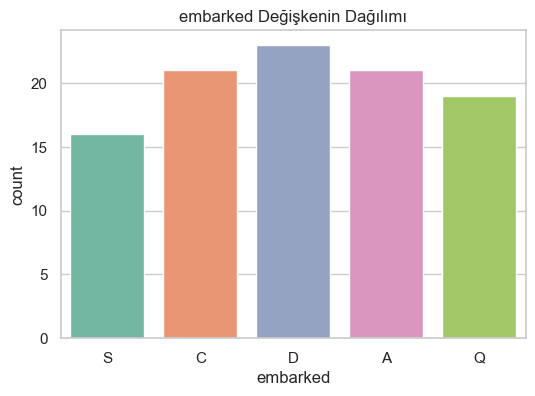

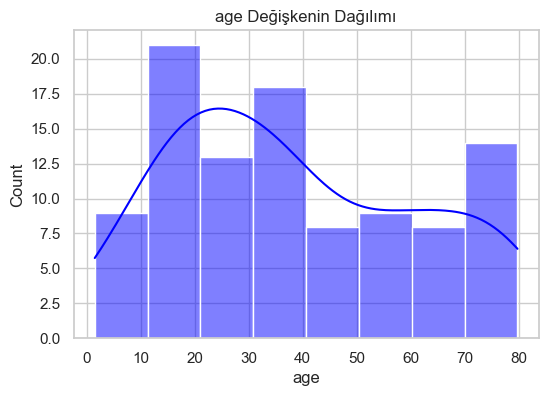

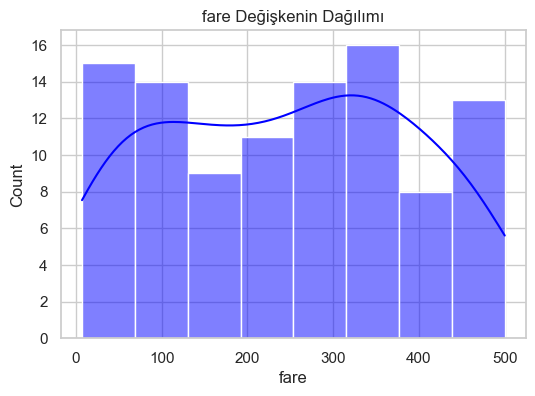


Korelasyon Grafiği


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.115814,-0.045358,0.057833,-0.086639,-0.022393
pclass,-0.115814,1.000000,-0.172045,-0.147354,-0.202351,-0.015027
age,-0.045358,-0.172045,1.000000,0.135167,0.110601,-0.142376
sibsp,0.057833,-0.147354,0.135167,1.000000,0.146059,0.203138
parch,-0.086639,-0.202351,0.110601,0.146059,1.000000,0.158454
fare,-0.022393,-0.015027,-0.142376,0.203138,0.158454,1.000000


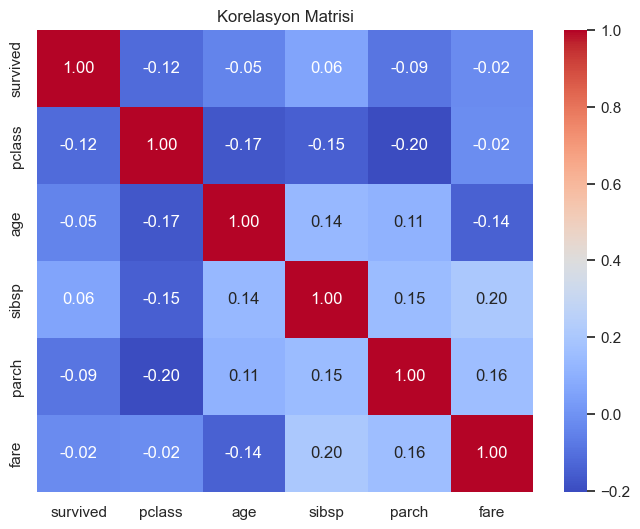

/var/folders/qg/23392h_n7lx_zx6pzx2jrxlc0000gn/T/ipykernel_22465/3218000643.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set1')


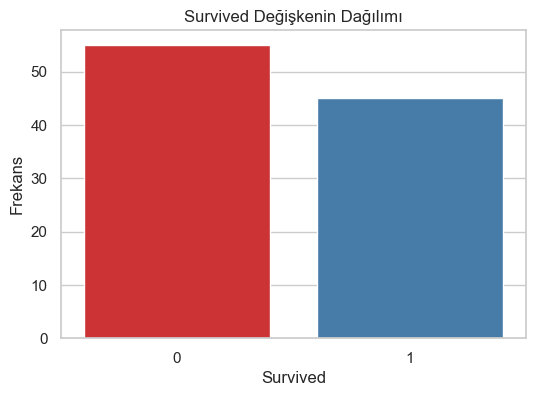

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


sns.set(style="whitegrid")

data_path="../data/kullanilacak_veri_kumesi.csv"

df=pd.read_csv(data_path)

print("gelen veri kümesinin ilk beş satırı:")
display(df.head())

print("\nveri kümesinin özeti:")
display(df.info())

print("\n veri kümesinin temel istatistileri:")
display(df.describe())

print("\nEksik değer analizi:")
missing_values=df.isnull().sum()
print(missing_values)

#eksik değerleri görsellleştirme
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
plt.title("Eksik Değerler Görselleştirme")
plt.show()


categorical_columns=['sex','embarked']
numerical_columns=['age','fare']

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df,palette='Set2')
    plt.title(f"{col} Değişkenin Dağılımı")
    plt.show()
    
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')   
    plt.title(f"{col} Değişkenin Dağılımı")
    plt.show()
 
    
# Calculate correlation for numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()

print("\nKorelasyon Grafiği")
display(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()



plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df, palette='Set1')
plt.title("Survived Değişkenin Dağılımı")
plt.xlabel("Survived")
plt.ylabel("Frekans")
plt.show()
